# Moving Average

## 1. Paqueterías

In [1]:
#pip install pandas
import pandas as pd

In [2]:
#pip install sklearn.metrics
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as ptl #Gráficas

## 2. Leer Datos

In [4]:
datos = pd.read_csv("datos_completos.csv")

In [5]:
datos.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,1,1,9,4,12,0.413793,2275,1.562500,9,...,12,0.413793,0.413793,0.413793,2275,2275,2275,1.562500,1.562500,1.562500
1,1,2,1,4,0,13,0.448276,1856,1.274725,9,...,12,0.413793,0.413793,0.413793,2275,2275,2275,1.562500,1.562500,1.562500
2,1,3,1,0,0,2,0.068966,157,0.107830,4,...,12,0.448276,0.413793,0.413793,1856,2275,2275,1.274725,1.562500,1.562500
3,1,4,1,0,2,2,0.068966,2,0.001374,0,...,12,0.068966,0.448276,0.413793,157,1856,2275,0.107830,1.274725,1.562500
4,1,5,1,2,0,6,0.206897,343,0.235577,0,...,13,0.068966,0.068966,0.448276,2,157,1856,0.001374,0.107830,1.274725


In [6]:
datos.shape

(422239, 24)

In [7]:
datos.columns

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

# 3. Formato a Datos

In [8]:
datos_ma = datos.drop(['ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'], axis=1)

In [9]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes
0,1,1,1,9,4
1,1,2,1,4,0
2,1,3,1,0,0
3,1,4,1,0,2
4,1,5,1,2,0


# 4. Promedios Móviles

4.1 Pedir datos del mes pasado

In [10]:
datos_ma['m1_pedir_mes_anterior'] =datos_ma['ventas_totales']

In [11]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior
0,1,1,1,9,4,9
1,1,2,1,4,0,4
2,1,3,1,0,0,0
3,1,4,1,0,2,0
4,1,5,1,2,0,2


4.2 Pedir el promedio de dos meses anteriores

In [12]:
datos_ma['m2_pedir_2_meses_anteriores'] = datos_ma.groupby(['pdv_id', 'sku_id']).rolling(2)['ventas_totales'].mean().reset_index(drop=True)

In [13]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores
0,1,1,1,9,4,9,NaN
1,1,2,1,4,0,4,6.5
2,1,3,1,0,0,0,2.0
3,1,4,1,0,2,0,0.0
4,1,5,1,2,0,2,1.0


4.3 Pedir el promedio de tres meses anteriores

In [14]:
datos_ma['m3_pedir_3_meses_anteriores'] = datos_ma.groupby(['pdv_id', 'sku_id']).rolling(3)['ventas_totales'].mean().reset_index(drop=True)

In [15]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
0,1,1,1,9,4,9,NaN,NaN
1,1,2,1,4,0,4,6.5,NaN
2,1,3,1,0,0,0,2.0,4.333333
3,1,4,1,0,2,0,0.0,1.333333
4,1,5,1,2,0,2,1.0,0.666667


# 5. Cálculo de Errores

5.1 Dividir por mes

In [16]:
error_julio= datos_ma[datos_ma.mes_id==1]
error_julio.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
0,1,1,1,9,4,9,NaN,NaN
10,1,1,2,2,1,2,NaN,NaN
20,1,1,3,1,6,1,NaN,NaN
30,1,1,4,0,2,0,NaN,NaN
40,1,1,5,0,0,0,NaN,NaN


In [17]:
error_agosto= datos_ma[datos_ma.mes_id==2]
error_agosto.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
1,1,2,1,4,0,4,6.5,NaN
11,1,2,2,1,0,1,1.5,NaN
21,1,2,3,6,1,6,3.5,NaN
31,1,2,4,2,1,2,1.0,NaN
41,1,2,5,0,0,0,0.0,NaN


In [18]:
error_septiembre= datos_ma[datos_ma.mes_id==3]
error_septiembre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
2,1,3,1,0,0,0,2.0,4.333333
12,1,3,2,0,0,0,0.5,1.000000
22,1,3,3,1,0,1,3.5,2.666667
32,1,3,4,1,1,1,1.5,1.000000
42,1,3,5,0,1,0,0.0,0.000000


In [19]:
error_octubre= datos_ma[datos_ma.mes_id==4]
error_octubre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
3,1,4,1,0,2,0,0.0,1.333333
13,1,4,2,0,0,0,0.0,0.333333
23,1,4,3,0,4,0,0.5,2.333333
33,1,4,4,1,0,1,1.0,1.333333
43,1,4,5,1,0,1,0.5,0.333333


In [20]:
error_noviembre= datos_ma[datos_ma.mes_id==5]
error_noviembre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
4,1,5,1,2,0,2,1.0,0.666667
14,1,5,2,0,0,0,0.0,0.000000
24,1,5,3,4,4,4,2.0,1.666667
34,1,5,4,0,0,0,0.5,0.666667
44,1,5,5,0,0,0,0.5,0.333333


In [21]:
error_diciembre= datos_ma[datos_ma.mes_id==6]
error_diciembre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
5,1,6,1,0,0,0,1.0,0.666667
15,1,6,2,0,0,0,0.0,0.000000
25,1,6,3,4,0,4,4.0,2.666667
35,1,6,4,0,0,0,0.0,0.333333
45,1,6,5,0,0,0,0.0,0.333333


In [22]:
error_enero= datos_ma[datos_ma.mes_id==7]
error_enero.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
6,1,7,1,0,0,0,0.0,0.666667
16,1,7,2,0,0,0,0.0,0.000000
26,1,7,3,0,0,0,2.0,2.666667
36,1,7,4,0,0,0,0.0,0.000000
46,1,7,5,0,0,0,0.0,0.000000


In [23]:
error_febrero= datos_ma[datos_ma.mes_id==8]
error_febrero.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
7,1,8,1,0,0,0,0.0,0.000000
17,1,8,2,0,0,0,0.0,0.000000
27,1,8,3,0,0,0,0.0,1.333333
37,1,8,4,0,0,0,0.0,0.000000
47,1,8,5,0,0,0,0.0,0.000000


In [24]:
error_marzo= datos_ma[datos_ma.mes_id==9]
error_marzo.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
8,1,9,1,0,0,0,0.0,0.0
18,1,9,2,0,0,0,0.0,0.0
28,1,9,3,0,0,0,0.0,0.0
38,1,9,4,0,0,0,0.0,0.0
48,1,9,5,0,0,0,0.0,0.0


In [25]:
error_m1_julio = mean_absolute_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_mes_anterior'])
error_m2_julio = None
error_m3_julio = None

In [26]:
error_m1_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_mes_anterior'])
error_m2_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_pedir_2_meses_anteriores'])
error_m3_agosto = None

In [27]:
error_m1_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_mes_anterior'])
error_m2_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_pedir_2_meses_anteriores'])
error_m3_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_pedir_3_meses_anteriores'])

In [28]:
error_m1_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_mes_anterior'])
error_m2_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_pedir_2_meses_anteriores'])
error_m3_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_pedir_3_meses_anteriores'])

In [29]:
error_m1_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_mes_anterior'])
error_m2_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_pedir_2_meses_anteriores'])
error_m3_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_pedir_3_meses_anteriores'])

In [30]:
error_m1_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_mes_anterior'])
error_m2_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_pedir_2_meses_anteriores'])
error_m3_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_pedir_3_meses_anteriores'])

In [31]:
error_m1_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_mes_anterior'])
error_m2_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_pedir_2_meses_anteriores'])
error_m3_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_pedir_3_meses_anteriores'])

In [32]:
error_m1_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_mes_anterior'])
error_m2_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_pedir_2_meses_anteriores'])
error_m3_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_pedir_3_meses_anteriores'])

In [33]:
error_m1_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_mes_anterior'])
error_m2_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_pedir_2_meses_anteriores'])
error_m3_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_pedir_3_meses_anteriores'])

In [34]:
errores_mae = [['Julio', error_m1_julio, error_m2_julio, error_m3_julio],
               ['Agosto', error_m1_agosto, error_m2_agosto, error_m3_agosto],
               ['Septiembre', error_m1_septiembre, error_m2_septiembre, error_m3_septiembre],
               ['Octubre', error_m1_octubre, error_m2_octubre, error_m3_octubre],
               ['Noviembre', error_m1_noviembre, error_m2_noviembre, error_m3_noviembre],
               ['Diciembre', error_m1_diciembre, error_m2_diciembre, error_m3_diciembre],
               ['Enero', error_m1_enero, error_m2_enero, error_m3_enero],
               ['Febrero', error_m1_febrero, error_m2_febrero, error_m3_febrero],
               ['Marzo', error_m1_marzo, error_m2_marzo, error_m3_marzo]
              ]
mae = pd.DataFrame(errores_mae, columns = ['Mes', 'mae_pedir_anterior','mae_promedio_2_meses_anteriores','mae_promedio_3_meses_anteriores'])
mae

,Mes,mae_pedir_anterior,mae_promedio_2_meses_anteriores,mae_promedio_3_meses_anteriores
0,Julio,0.126160,NaN,NaN
1,Agosto,0.122205,0.121104,NaN
2,Septiembre,0.036851,0.080997,0.094599
3,Octubre,0.087486,0.090257,0.111816
4,Noviembre,0.180750,0.164835,0.163604
5,Diciembre,0.160549,0.129879,0.099872
6,Enero,0.049522,0.103152,0.099541
7,Febrero,0.026383,0.035608,0.075731
8,Marzo,0.011250,0.015962,0.023699


Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base')

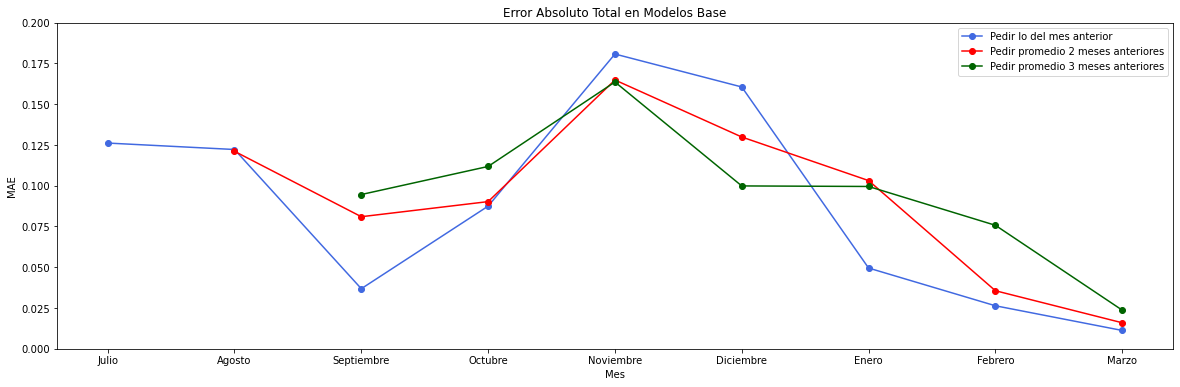

In [38]:
ptl.figure(figsize=(20,6)) #impresión de la figura
ptl.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
ptl.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
ptl.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
ptl.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
ptl.ylim(0, 0.2)
ptl.ylabel('MAE')
ptl.xlabel('Mes')
ptl.title('Error Absoluto Total en Modelos Base')
#-p une puntos con lineas
#azul menos 